Advanced - Data Visualisation with Matplotlib: Programming Languages

In [3]:
import pandas as pd
# to nullify the existing column names by adding new column names, by assigning header=0
df=pd.read_csv("C:\\code+lab\\Pyhton_Lab\\100Days_Python\\DAY73-DataVisualization\\QueryResults.csv",names=['DATE','TAG','POSTS'],header=0)

In [4]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [5]:
df.tail()


,DATE,TAG,POSTS
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


In [7]:
# to remname the existiing columns
r_df=df.rename(columns={'DATE':'time','TAG':'lang','POSTS':'records'}) 
r_df.head()

,time,lang,records
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [8]:
df.shape

(1991, 3)

Given that the TAG serves as our category column, can you figure out how to count the number of posts per language? Which programming language had the most number of posts since the creation of Stack Overflow?

In [11]:
df.groupby('TAG').sum()

,DATE,POSTS
TAG,,
assembly,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,34852
c,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,336042
c#,2008-07-01 00:00:002008-08-01 00:00:002008-09-...,1423530
c++,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,684210
delphi,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,46212
go,2009-11-01 00:00:002009-12-01 00:00:002010-01-...,47499
java,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1696403
javascript,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2056510
perl,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,65286


The dataset starts in July 2008, so some languages will not have any posts for every month. Can you count how many months of posts exist for each programming language?

In [12]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


In [14]:
df['DATE'][1]  # to retrive a particular row of a column

'2008-08-01 00:00:00'

In [ ]:
# we can also use the dot notation
df.DATE[1]

In [64]:
#inspecting the data type
type(df['DATE'][1]) # by default the date is of thr str type 

pandas._libs.tslibs.timestamps.Timestamp

Data Cleaning: Working with Time Stamps

In [19]:
df.DATE=pd.to_datetime(df.DATE) # converting the str to datetime, thisk also removes the 00:00:00

In [23]:
type(df.DATE[1])

pandas._libs.tslibs.timestamps.Timestamp

In [21]:
df.head() # observe the removal of 00:00:00

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


Data Manipulation: Pivoting DataFrames


Can you pivot the df DataFrame so that each row is a date and each column is a programming language? Store the result under a variable called reshaped_df. 

In [44]:
reshaped_df=df.pivot(index='DATE',columns='TAG',values='POSTS')

In [45]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


Examine the dimensions of the reshaped DataFrame. How many rows does it have? How many columns?

In [46]:
reshaped_df.shape

(145, 14)

Examine the dimensions of the reshaped DataFrame. How many rows does it have? How many columns?

In [47]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


In [48]:
reshaped_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0
2020-06-01,363.0,2757.0,9064.0,6161.0,214.0,765.0,13015.0,23360.0,203.0,7188.0,31817.0,6249.0,670.0,3733.0
2020-07-01,298.0,2294.0,9145.0,5756.0,212.0,743.0,12723.0,23802.0,182.0,7334.0,31261.0,5694.0,775.0,3607.0


In [51]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [54]:
reshaped_df.count()

TAG
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64

Dealing with NaN Values

instead of dropping the NAN vlaues, we can replace them with a value of our choice by using 
.fillna()            -------- remember .isna() , .dropna()

In [95]:

reshaped_df.fillna('0',inplace=True)  


In [60]:
reshaped_df.head() #  observe the 0 filling the NAN .

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0,0,3.0,0,0,0,0,0,0,0,0,0,0,0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0,222.0,162.0,28.0,161.0,124.0,0,73.0,0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0,1153.0,725.0,127.0,617.0,510.0,0,249.0,0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0


In [61]:
#check if there are any null values prresent?
reshaped_df.isna().values.any()  # these additional parameters are used to get the answer directly, instead of searching the result.

False

    Data Visualisation with Matplotlib

In [88]:
import pandas as pd
import matplotlib.pyplot as plt  # for visualizations we  need to import matplotlib

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html  -- refer this for documentation

TypeError: 'value' must be an instance of str or bytes, not a float

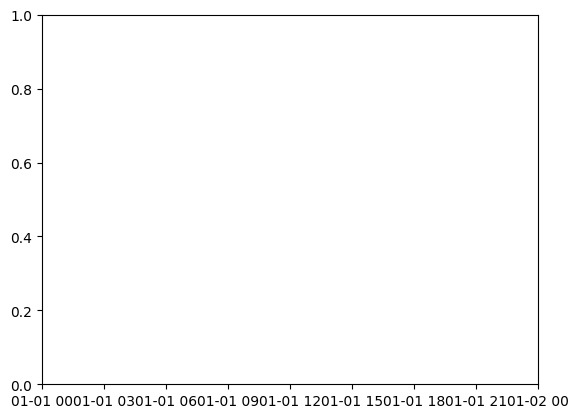

In [96]:
plt.plot(reshaped_df.index,reshaped_df.java)

In [111]:
type(reshaped_df.java[1])  # observe the type of java column 

float

In [115]:
reshaped_df.java=reshaped_df.java.astype(int) # here we are changing the type of java column to int for plotting 

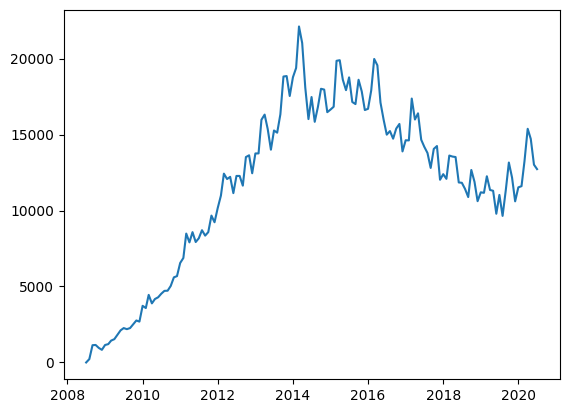

In [116]:
plt.plot(reshaped_df.index,reshaped_df.java.astype(int))  

Styling the Chart

Let's look at a couple of methods that will help us style our chart:

.figure() - allows us to resize our chart

.xticks() - configures our x-axis

.yticks() - configures our y-axis

.xlabel() - add text to the x-axis

.ylabel() - add text to the y-axis

.ylim() - allows us to set a lower and upper bound

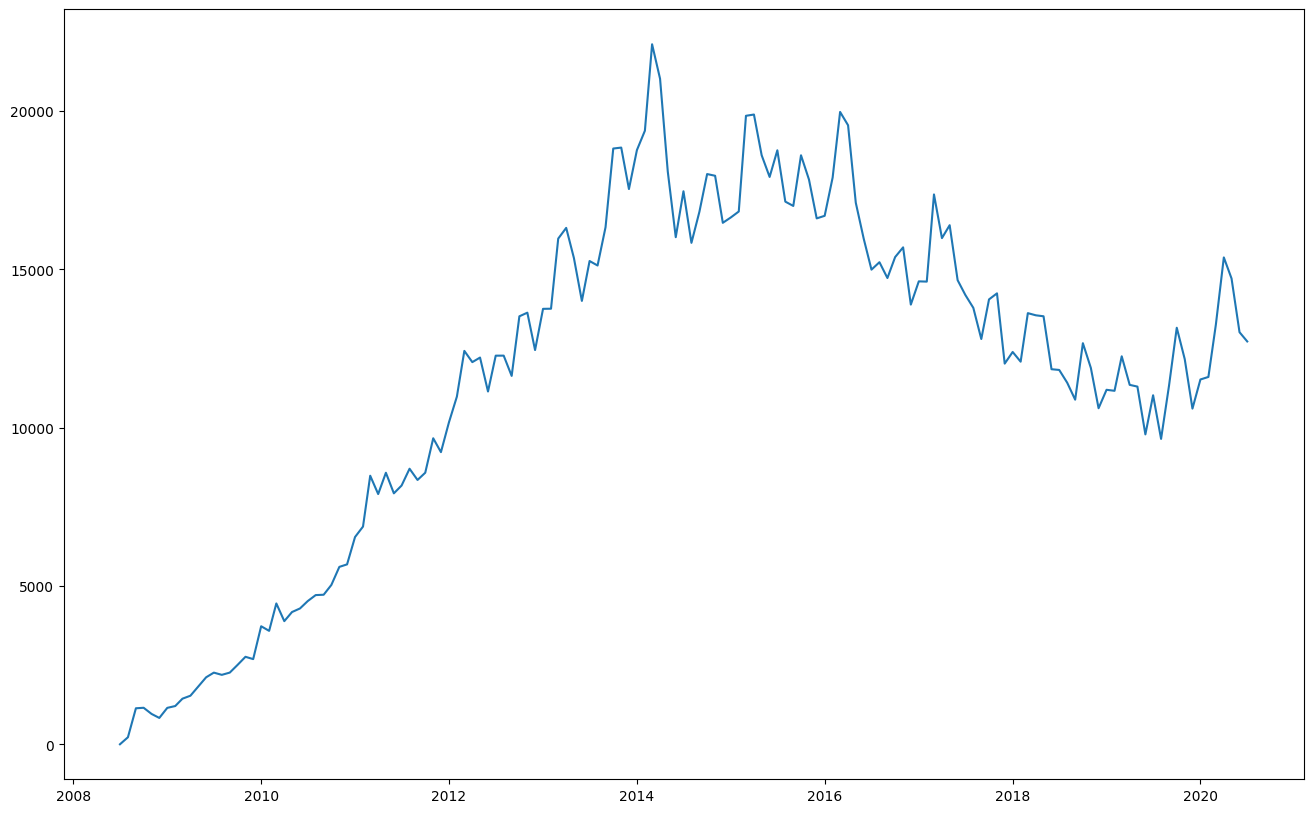

In [118]:
#To make our chart larger we can provide a width (16) and a height (10) as the figsize of the figure.
plt.figure(figsize=(16,10))
plt.plot(reshaped_df.index,reshaped_df.java)

when we increase the size of the chart, we should also increase the fontsize of the ticks on our axes so that they remain easy to read:

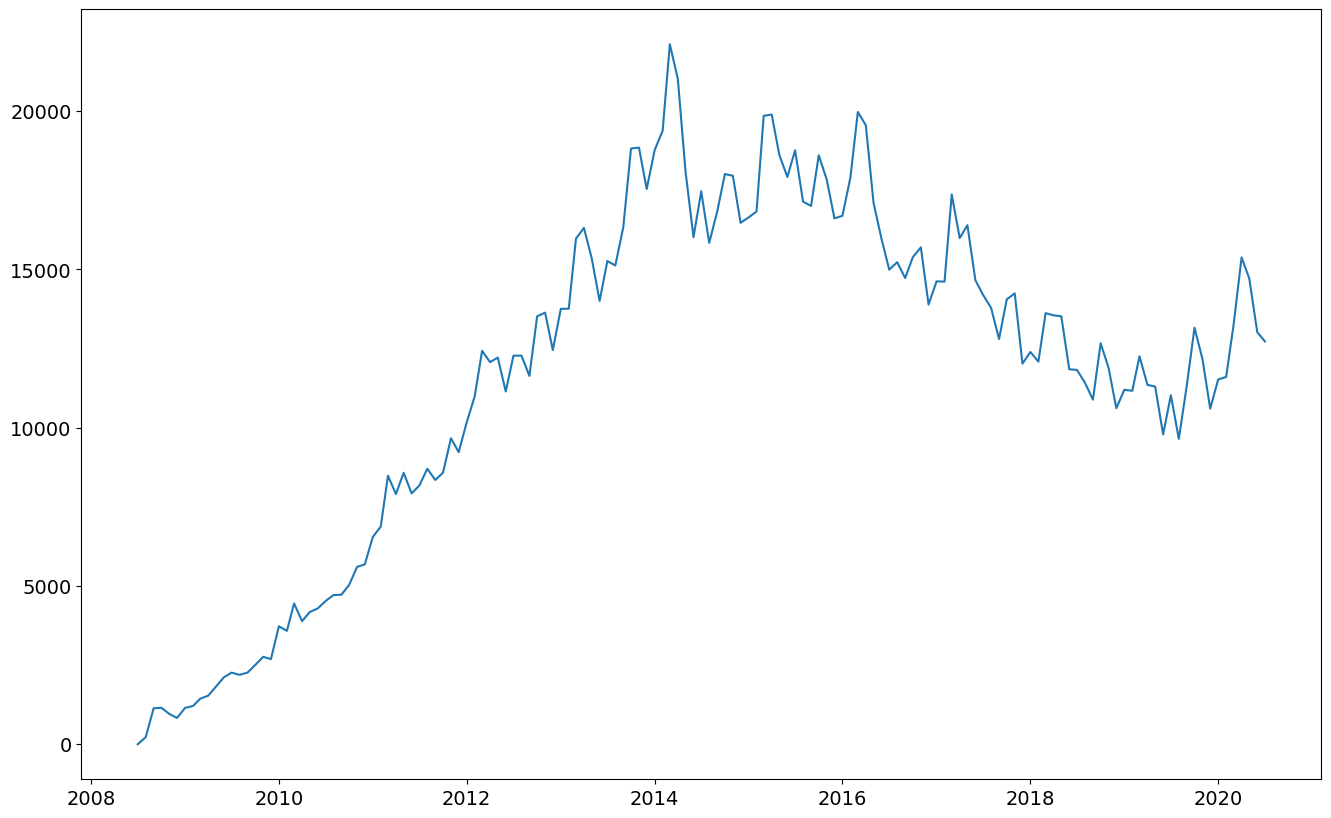

In [122]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(reshaped_df.index,reshaped_df.java)

Now we can add labels. Also, we're never going to get less than 0 posts, so let's set a lower limit of 0 for the y-axis with .ylim().

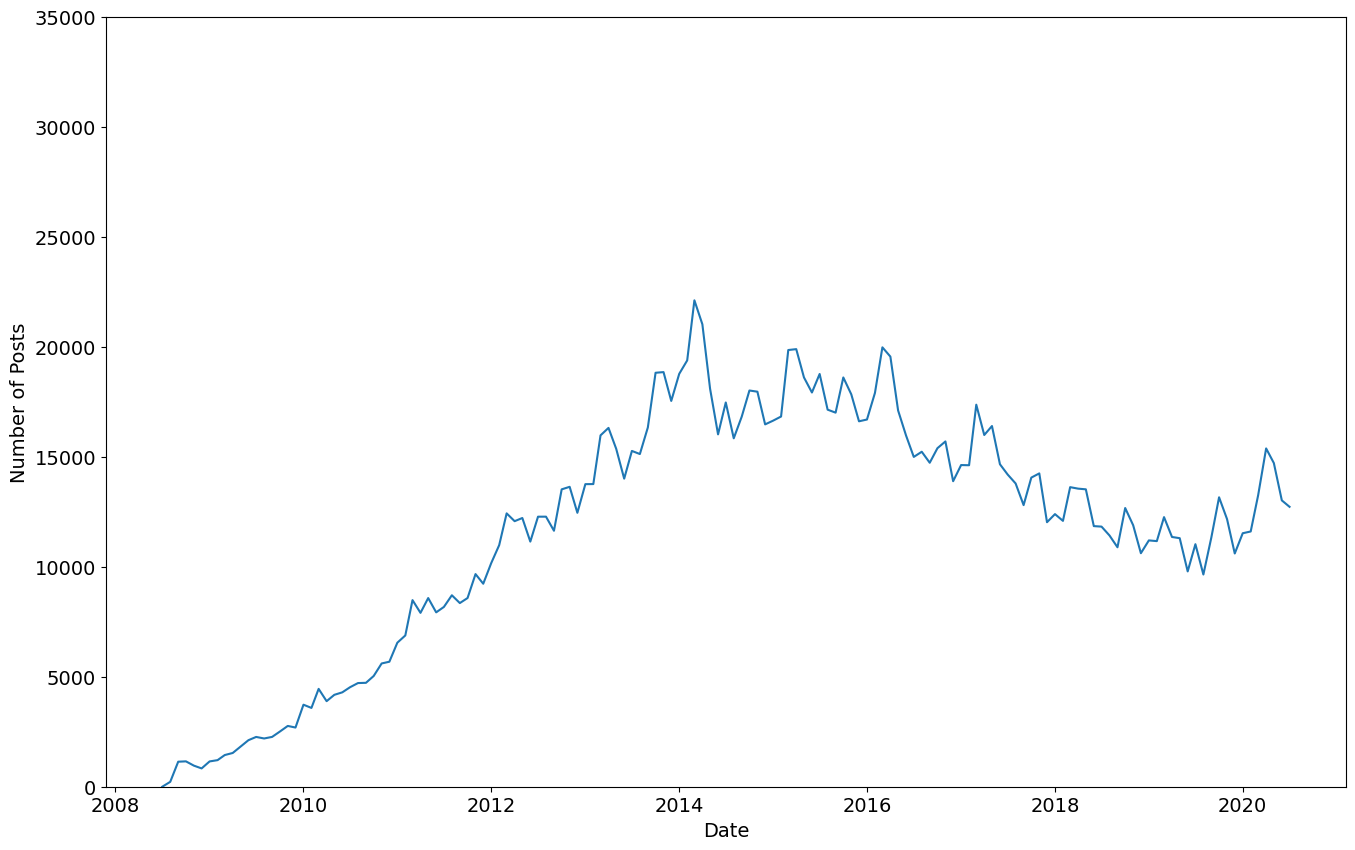

In [126]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Number of Posts',fontsize=14)
plt.ylim(0,35000)
plt.plot(reshaped_df.index,reshaped_df['java'])

    

Multi-Line Charts with Matplotib

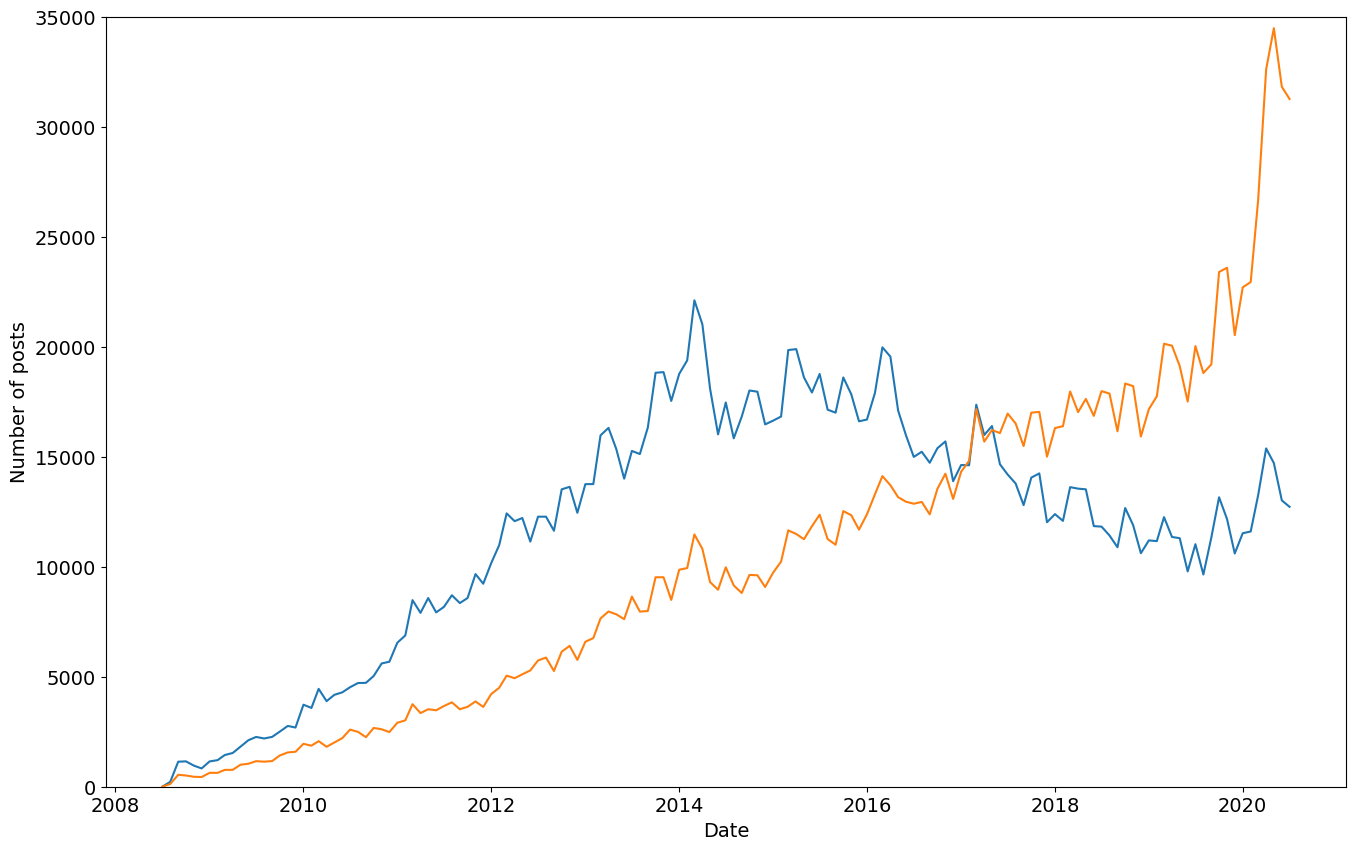

In [130]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Number of posts',fontsize=14)
plt.ylim(0,35000)
plt.plot(reshaped_df.index,reshaped_df.java)
reshaped_df.python=reshaped_df.python.astype(int) # converting the pyhton column type to int
plt.plot(reshaped_df.index,reshaped_df.python) # we just need to use another plot and nothing muchn for multiple lines.



But what if we wanted to plot all the programming languages on the same chart? We don't want to type out .plot() a million times, right? We can actually just use a for-loop:

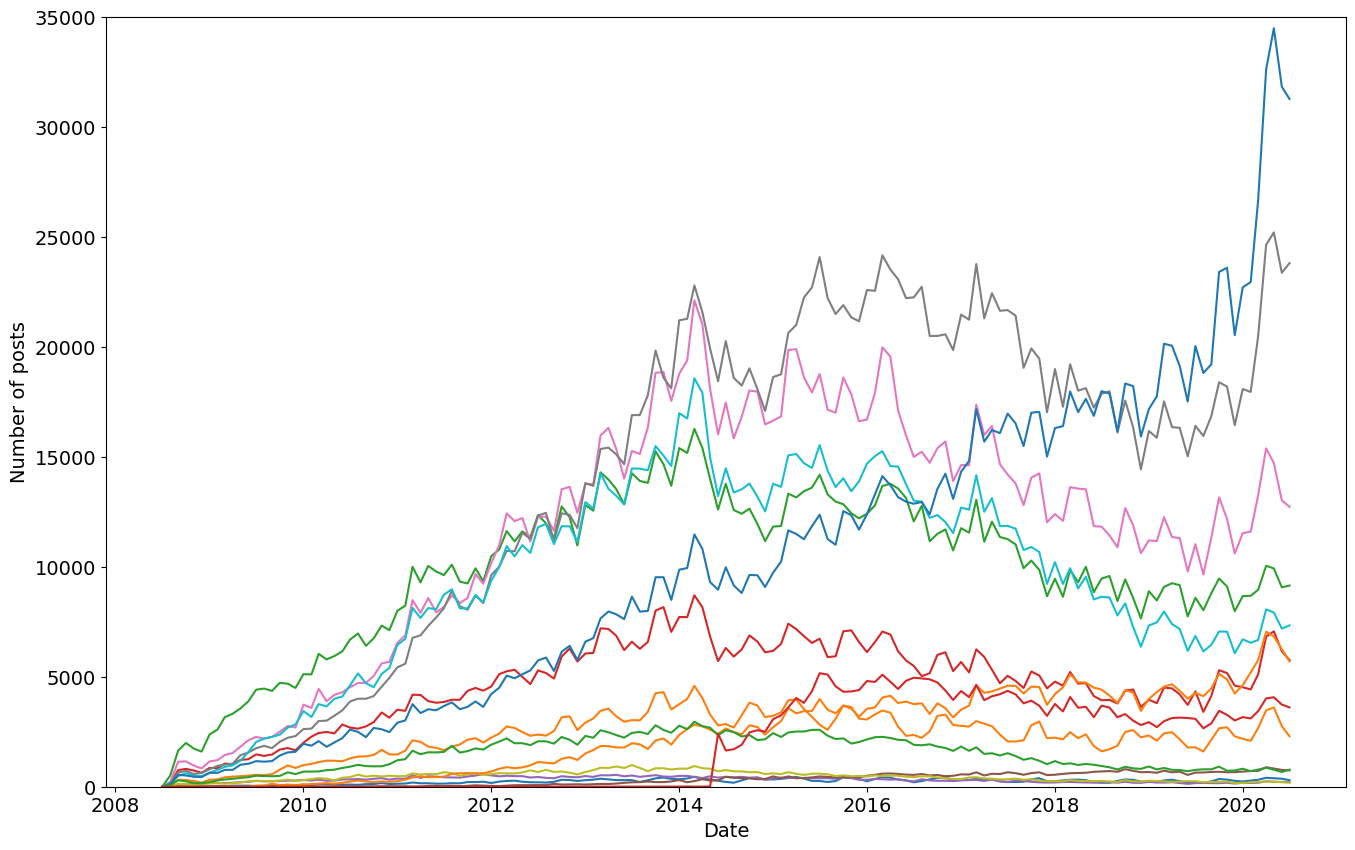

In [133]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Number of posts',fontsize=14)
plt.ylim(0,35000)

for column in reshaped_df.columns:
    reshaped_df[column]=reshaped_df[column].astype(int) # changing the column type to int before plotting
    plt.plot(reshaped_df.index,reshaped_df[column])
    


which language is which? It's really hard to make out without a legend that tells us which colour corresponds to each language. Let's modify the plotting code to add a label for each line based on the column name (and make the lines thicker at the same time using linewidth). Then let's add a legend to our chart:

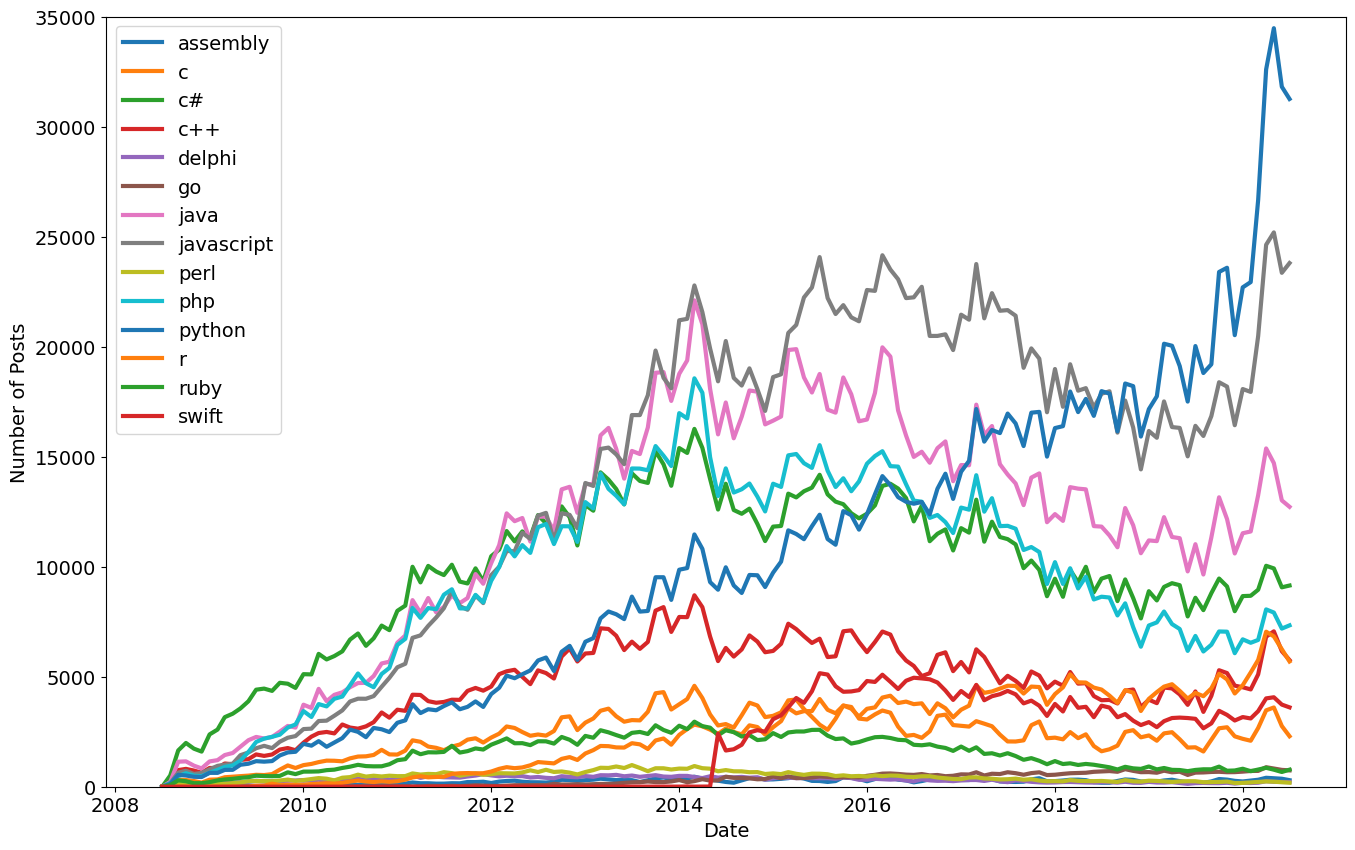

In [138]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Number of Posts',fontsize=14)
plt.ylim(0,35000)
for column in reshaped_df.columns:
    reshaped_df[column]=reshaped_df[column].astype(int)
    plt.plot(reshaped_df.index,reshaped_df[column],linewidth=3,label=reshaped_df[column].name)
    plt.legend(fontsize=14)
    

Smoothing out Time-Series Data
Looking at our chart we see that time-series data can be quite noisy, with a lot of up and down spikes. This can sometimes make it difficult to see what's going on.

A useful technique to make a trend apparent is to smooth out the observations by taking an average. By averaging say, 6 or 12 observations we can construct something called the rolling mean. Essentially we calculate the average in a window of time and move it forward by one observation at a time.

Since this is such a common technique, Pandas actually two handy methods already built-in: rolling() and mean(). We can chain these two methods up to create a DataFrame made up of the averaged observations.

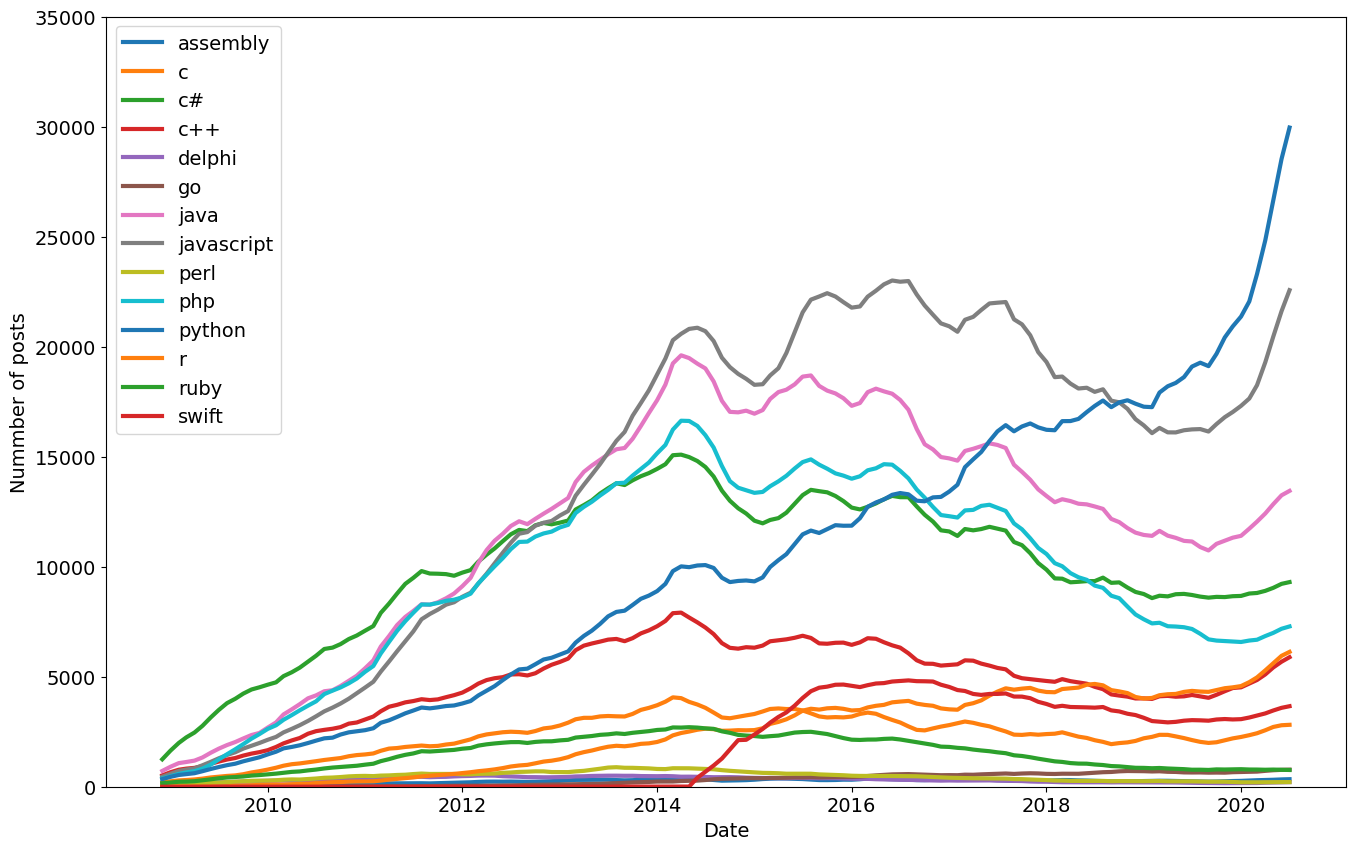

In [148]:
roll_df=reshaped_df.rolling(window=6).mean() # rolling is to divide series in to small windows, mean is to avg the windows.

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Nummber of posts',fontsize=14)
plt.ylim(0,35000)

for column in roll_df.columns:
    plt.plot(roll_df.index,roll_df[column],linewidth=3,label=roll_df[column].name)
    
    plt.legend(fontsize=14)

used .groupby() to explore the number of posts and entries per programming language

converted strings to Datetime objects with to_datetime() for easier plotting

reshaped our DataFrame by converting categories to columns using .pivot()

used .count() and isna().values.any() to look for NaN values in our DataFrame, which we then replaced using .fillna()

created (multiple) line charts using .plot() with a for-loop

styled our charts by changing the size, the labels, and the upper and lower bounds of our axis.

added a legend to tell apart which line is which by colour

smoothed out our time-series observations with .rolling().mean() and plotted them to better identify trends over time.

